In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dropout

2023-01-13 18:42:09.617072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 18:42:09.724315: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-13 18:42:10.702554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-13 18:42:10.702617: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
biological_data = pd.read_csv("biological_data.csv").drop('Unnamed: 0', axis=1)

In [3]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [4]:
human_data = biological_data.copy()

In [5]:
human_data['X2'] = human_data.apply(lambda x: getKmers(x['X2']), axis=1)
human_data['X3'] = human_data.apply(lambda x: getKmers(x['X3']), axis=1)

In [6]:
human_data['X2']

0       [xshsmr, shsmry, hsmryf, smryfs, mryfst, ryfst...
1       [xshsmr, shsmry, hsmryf, smryfs, mryfst, ryfst...
2       [xshsmr, shsmry, hsmryf, smryfs, mryfst, ryfst...
3       [xshsmr, shsmry, hsmryf, smryfs, mryfst, ryfst...
4       [xshsmr, shsmry, hsmryf, smryfs, mryfst, ryfst...
                              ...                        
1990    [xshsmr, shsmry, hsmryf, smryfd, mryfdt, ryfdt...
1991    [xshsmr, shsmry, hsmryf, smryfd, mryfdt, ryfdt...
1992    [xshsmr, shsmry, hsmryf, smryfy, mryfyt, ryfyt...
1993    [xshsmr, shsmry, hsmryf, smryfy, mryfyt, ryfyt...
1994    [xshsmr, shsmry, hsmryf, smryfy, mryfyt, ryfyt...
Name: X2, Length: 1995, dtype: object

In [7]:
human_data_X2 = list(human_data['X2'])
human_data_X3 = list(human_data['X3'])
for item in range(len(human_data)):
    human_data_X2[item] = ' '.join(human_data_X2[item])
    human_data_X3[item] = ' '.join(human_data_X3[item])


In [8]:
human_data.loc[human_data['Y'] < 50, 'Y'] = 0
human_data.loc[human_data['Y'] > 50, 'Y'] = 1

In [10]:
y_data = human_data.iloc[:, 0].values 

In [13]:
X4 = human_data['X4'].values.reshape(-1,1)
X5 = human_data['X5'].values.reshape(-1,1)
X6 = human_data['X6'].values.reshape(-1,1)

X4X5X6 = np.concatenate((X4,X5,X6), axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X4X5X6, y_data, test_size = 0.20, random_state=42)

In [ ]:
DNNmodel = Sequential()
DNNmodel.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
DNNmodel.add(Dropout(0.7))
DNNmodel.add(Dense(20, activation='relu'))
DNNmodel.add(Dropout(0.7))
DNNmodel.add(Dense(4, activation='relu'))
DNNmodel.add(Dropout(0.7))
DNNmodel.add(Dense(1, activation='sigmoid'))

history = DNNmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = DNNmodel.fit(X_train, y_train, epochs=1000, batch_size=8, validation_data=(X_test, y_test))

In [ ]:
y_pred = DNNmodel.predict(X_test)

In [ ]:
x = np.arange(399)
plt.figure(figsize=(15,3))
plt.scatter(x,y_test,label="Truth")
plt.scatter(x,y_pred,label="DNN")
plt.legend('test data')
plt.show()

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [ ]:
score = DNNmodel.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# DNN X4,X5,X6

In [ ]:
DNNmodel = Sequential()
DNNmodel.add(Dense(3, input_dim=X_train.shape[1], activation='relu'))
DNNmodel.add(Dropout(0.7))
DNNmodel.add(Dense(2, activation='relu'))
DNNmodel.add(Dropout(0.7))
DNNmodel.add(Dense(1, activation='sigmoid'))

history = DNNmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = DNNmodel.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
y_pred = DNNmodel.predict(X_test)

In [ ]:
plt.figure(figsize=(15,3))
plt.scatter(x,y_test,label="Truth")
plt.scatter(x,y_pred,label="DNN")
plt.legend('test data')
plt.show()

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [ ]:
score = DNNmodel.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
###### SVM ######

In [24]:
X_train

array([[ 93.44444444, 114.77777778, -25.11111111],
       [ 63.11111111,  91.11111111, -14.55555556],
       [ 81.        , 106.22222222,  -7.22222222],
       ...,
       [ 85.33333333, 109.77777778, -11.        ],
       [ 79.27777778, 106.22222222, -22.22222222],
       [101.05555556, 120.22222222, -40.44444444]])

In [25]:
X_train = normalize(X_train, axis=1, norm='l1')

In [26]:
X_train

array([[ 0.40047619,  0.49190476, -0.10761905],
       [ 0.37393022,  0.53982883, -0.08624095],
       [ 0.41657143,  0.54628571, -0.03714286],
       ...,
       [ 0.41401617,  0.53261456, -0.05336927],
       [ 0.38165285,  0.51136668, -0.10698048],
       [ 0.3861176 ,  0.45935046, -0.15453195]])

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [30]:
# Support Vector Machine
#Defining SVM kernel ()
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

model = SVC(kernel = kernels[2]) #RBF kernel
#Training the model
model.fit(X_train, y_train)

#Testing the model
y_pred = model.predict(X_test)

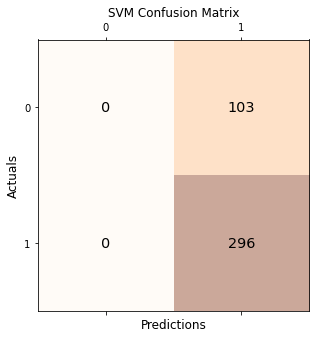

SVM:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.74      1.00      0.85       296

    accuracy                           0.74       399
   macro avg       0.37      0.50      0.43       399
weighted avg       0.55      0.74      0.63       399



/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [31]:
#Calculating and ploting the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('SVM Confusion Matrix', fontsize=12)
plt.show()

#Reporting the results
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)
print('SVM:\n\n',classification_report(y_test,y_pred))

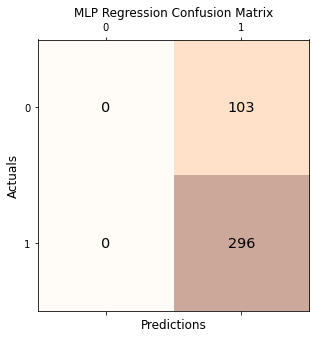

MLP Results:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.74      1.00      0.85       296

    accuracy                           0.74       399
   macro avg       0.37      0.50      0.43       399
weighted avg       0.55      0.74      0.63       399



/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [33]:
# Multi Layer Perceptron (MLP)
NN = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(15, 2), activation='relu', random_state=1, batch_size= 16, max_iter =10000)
#solver = ['lbfgs', 'sgd', 'adam'], default='adam'
#activation = ['identity', 'logistic', 'tanh', 'relu'], default=’relu’
NN.fit(X_train, y_train)
y_pred = NN.predict(X_test)

#Reporting the results
#Calculating and ploting the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('MLP Regression Confusion Matrix', fontsize=12)
plt.show()

print('MLP Results:\n\n',classification_report(y_test,y_pred))